In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.plotting.backend = "plotly"

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.tree import export_graphviz
from graphviz import Source

from sklearn.pipeline import Pipeline, make_pipeline

import pandas_profiling

Duplicate key in file PosixPath('/Users/jonghae/venv-tf/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 255 ('font.family:AppleGothic')
Duplicate key in file PosixPath('/Users/jonghae/venv-tf/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 256 ('font.size:12')
Duplicate key in file PosixPath('/Users/jonghae/venv-tf/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 370 ('axes.titlesize:     large   # fontsize of the axes title')
Duplicate key in file PosixPath('/Users/jonghae/venv-tf/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 376 ('axes.labelsize:     medium  # fontsize of the x any y labels')
Duplicate key in file PosixPath('/Users/jonghae/venv-tf/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 410 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')
Duplicate key in file PosixPath('/Users/jonghae/venv-tf/lib/python3.8/site-packages/matplotlib

In [2]:
eda_df=pd.read_csv('./eda_df_last.csv')
eda_df

,First_pokemon,Second_pokemon,Winner,#_x,Name_x,Type 1_x,Type 2_x,HP_x,Attack_x,Defense_x,...,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Generation_y,Legendary_y,pokemon_no,battle_no,win_no,win_percentage
0,266,298,298,266,Larvitar,Rock,Ground,50,64,50,...,40,60,40,60,3,False,266,110,25,22.73
1,702,701,701,702,Virizion,Grass,Fighting,91,90,72,...,90,72,90,108,5,True,702,125,112,89.60
2,191,668,668,191,Togetic,Fairy,Flying,55,40,85,...,75,125,95,40,5,False,191,127,30,23.62
3,237,683,683,237,Slugma,Fire,NaN,40,40,40,...,90,60,90,48,5,False,237,123,4,3.25
4,151,231,151,151,Omastar,Rock,Water,70,60,125,...,230,10,230,5,2,False,151,138,49,35.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,707,126,707,707,Reshiram,Dragon,Fire,100,120,100,...,70,70,25,60,1,False,707,125,91,72.80
49996,589,664,589,589,Drilbur,Ground,NaN,60,85,40,...,40,45,40,60,5,False,589,109,70,64.22
49997,303,368,368,303,Pelipper,Water,Flying,60,50,100,...,60,60,60,90,3,False,303,124,59,47.58
49998,109,89,109,109,Voltorb,Electric,NaN,40,30,50,...,70,95,55,45,1,False,109,113,66,58.41


In [4]:
eda_df.columns

Index(['First_pokemon', 'Second_pokemon', 'Winner', '#_x', 'Name_x',
       'Type 1_x', 'Type 2_x', 'HP_x', 'Attack_x', 'Defense_x', 'Sp. Atk_x',
       'Sp. Def_x', 'Speed_x', 'Generation_x', 'Legendary_x', '#_y', 'Name_y',
       'Type 1_y', 'Type 2_y', 'HP_y', 'Attack_y', 'Defense_y', 'Sp. Atk_y',
       'Sp. Def_y', 'Speed_y', 'Generation_y', 'Legendary_y', 'pokemon_no',
       'battle_no', 'win_no', 'win_percentage'],
      dtype='object')

In [ ]:
# first_stats_cols = ['HP_x', 'Attack_x', 'Defense_x', 'Sp. Atk_x', 'Sp. Def_x', 'Speed_x']
# first_cat_cols = ['Type 1_x', 'Type 2_x', 'Generation_x', 'Legendary_x']
# second_stats_cols = ['HP_y', 'Attack_y', 'Defense_y', 'Sp. Atk_y','Sp. Def_y', 'Speed_y']
# second_cat_cols = ['Type 1_y', 'Type 2_y', 'Generation_y', 'Legendary_y']
# identical_cols = ['First_pokemon', 'Second_pokemon', 'Winner', '#_x', 'Name_x','#_y', 'Name_y',]
# battle_info_cols = ['pokemon_no','battle_no', 'win_no', 'win_percentage']

In [5]:
temp = eda_df[['First_pokemon', 'Second_pokemon', 'Winner',
               'Type 1_x', 'Type 2_x',
               'Type 1_y', 'Type 2_y',
               'Legendary_x', 'Legendary_y',
               'battle_no', 'win_no', 'win_percentage',
                      ]]
temp['Winner_mark']=temp.apply(lambda x:1 if x['First_pokemon'] == x['Winner'] else 2, axis=1)

<ipython-input-5-53ebd35732e7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Winner_mark']=temp.apply(lambda x:1 if x['First_pokemon'] == x['Winner'] else 2, axis=1)


In [6]:
temp

,First_pokemon,Second_pokemon,Winner,Type 1_x,Type 2_x,Type 1_y,Type 2_y,Legendary_x,Legendary_y,battle_no,win_no,win_percentage,Winner_mark
0,266,298,298,Rock,Ground,Grass,Dark,False,False,110,25,22.73,2
1,702,701,701,Grass,Fighting,Rock,Fighting,True,True,125,112,89.60,2
2,191,668,668,Fairy,Flying,Psychic,NaN,False,False,127,30,23.62,2
3,237,683,683,Fire,NaN,Dragon,NaN,False,False,123,4,3.25,2
4,151,231,151,Rock,Water,Bug,Rock,False,False,138,49,35.51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,707,126,707,Dragon,Fire,Water,NaN,True,False,125,91,72.80,1
49996,589,664,589,Ground,NaN,Electric,NaN,False,False,109,70,64.22,1
49997,303,368,368,Water,Flying,Normal,NaN,False,False,124,59,47.58,2
49998,109,89,109,Electric,NaN,Electric,Steel,False,False,113,66,58.41,1


In [7]:
temp['Type 1_x'].value_counts().index

Index(['Water', 'Normal', 'Bug', 'Grass', 'Psychic', 'Fire', 'Rock',
       'Electric', 'Ghost', 'Dragon', 'Ground', 'Dark', 'Poison', 'Steel',
       'Fighting', 'Ice', 'Fairy', 'Flying'],
      dtype='object')

In [32]:
def pure_match(first, second):
    pure_fight = temp.loc[((temp['Type 1_x']==first) & (temp['Type 2_x'].isnull()) &
                         (temp['Type 1_y']==second) & (temp['Type 2_y'].isnull()) )|
                         ((temp['Type 1_y']==first) & (temp['Type 2_y'].isnull()) &
                         (temp['Type 1_x']==second) & (temp['Type 2_x'].isnull()) ) ]
    
    # 검증
    full = pure_fight.shape[0]
    f1=pure_fight[pure_fight['Type 1_x']==first][(pure_fight.Winner==pure_fight.First_pokemon)].shape[0]
    f2=pure_fight[pure_fight['Type 1_y']==first][(pure_fight.Winner==pure_fight.Second_pokemon)].shape[0]
    s1 = pure_fight[pure_fight['Type 1_x']==second][(pure_fight.Winner==pure_fight.First_pokemon)].shape[0]
    s2 = pure_fight[pure_fight['Type 1_y']==second][(pure_fight.Winner==pure_fight.Second_pokemon)].shape[0]
    assert full == f1 +f2 + s1 + s2
    

    labels = [first, second]
    values = [first_win, second_win]

    fig = go.Figure(data=[go.Pie(labels=labels, 
                                 values=values,
                                 textinfo='label+percent'
                                )])
    fig.show()
                                    
    

<ipython-input-32-c60a27a6cdc4>:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-32-c60a27a6cdc4>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-32-c60a27a6cdc4>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-32-c60a27a6cdc4>:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



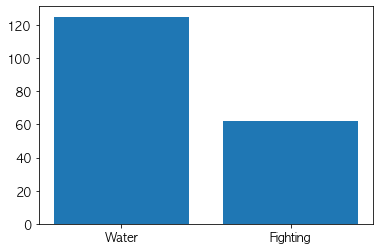

In [33]:
pure_match('Water','Fighting')

<ipython-input-32-c60a27a6cdc4>:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-32-c60a27a6cdc4>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-32-c60a27a6cdc4>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-32-c60a27a6cdc4>:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



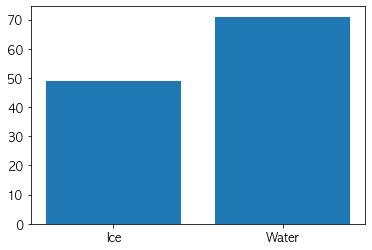

In [34]:
pure_match('Ice','Water')

<ipython-input-32-c60a27a6cdc4>:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-32-c60a27a6cdc4>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-32-c60a27a6cdc4>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-32-c60a27a6cdc4>:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



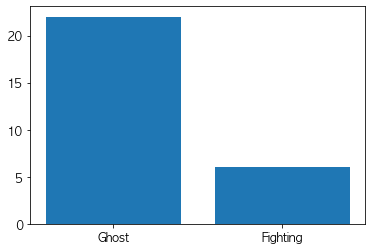

In [35]:
pure_match('Ghost','Fighting')

<ipython-input-32-c60a27a6cdc4>:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-32-c60a27a6cdc4>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-32-c60a27a6cdc4>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-32-c60a27a6cdc4>:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



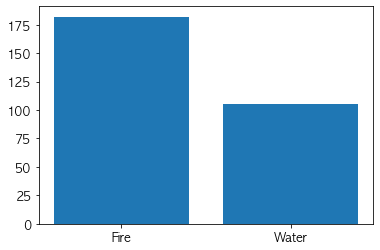

In [36]:
pure_match('Fire','Water')

In [ ]:
pure_match('Ice','Water')

In [ ]:
pure_fight = temp.loc[((temp['Type 1_x']=='Water') & (temp['Type 2_x'].isnull()) &
         (temp['Type 1_y']=='Fighting') & (temp['Type 2_y'].isnull()) )|
         ((temp['Type 1_y']=='Water') & (temp['Type 2_y'].isnull()) &
         (temp['Type 1_x']=='Fighting') & (temp['Type 2_x'].isnull()) )
        ]
pure_fight

In [ ]:
pure_fight[pure_fight['Type 1_x']=='Water'][(pure_fight.Winner==pure_fight.First_pokemon)]